# Exploration
This notebook manually checks for interesting correlations in the data. It requires you to have preprocessed the data beforehand

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data and parse date time columns
date_columns = ['date', 'issue_created_at', 'issue_closed_at', 'pull_request_created_at', 'pull_request_closed_at']
df = pd.read_csv('data/preprocessed_data.csv', parse_dates=date_columns)
df.head()

C:\Users\annik\AppData\Local\Temp\ipykernel_13172\4010154183.py:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/preprocessed_data.csv', parse_dates=date_columns)


,date,activity,contributor,repository,is_bot,issue_created_at,issue_is_closed,issue_closed_at,pull_request_created_at,pull_request_is_closed,pull_request_closed_at,amount_of_comments,pr_commits,pr_changed_files,pushed_commits,pushed_distinct_commits,comment_length
0,2022-11-25 09:55:19+00:00,Commenting pull request,AmplabJenkins,apache/spark,True,NaT,NaN,NaT,2022-11-24 04:42:12+00:00,False,NaT,2,NaN,NaN,NaN,NaN,40.0
1,2022-11-25 09:55:23+00:00,Commenting pull request,AmplabJenkins,apache/spark,True,NaT,NaN,NaT,2022-11-24 04:37:11+00:00,False,NaT,1,NaN,NaN,NaN,NaN,40.0
2,2022-11-25 09:55:26+00:00,Commenting pull request,AmplabJenkins,apache/spark,True,NaT,NaN,NaT,2022-11-24 04:05:07+00:00,False,NaT,3,NaN,NaN,NaN,NaN,40.0
3,2022-11-25 09:55:27+00:00,Commenting pull request,analysis-bot,facebook/react-native,True,NaT,NaN,NaT,2022-11-25 09:23:54+00:00,False,NaT,1,NaN,NaN,NaN,NaN,204.0
4,2022-11-25 09:55:47+00:00,Pushing commits,neos-bot,neos/neos-ui-compiled,True,NaT,NaN,NaT,NaT,NaN,NaT,0,NaN,NaN,1.0,1.0,NaN


## Statistical overview

In [9]:
# Group by 'is_bot' and calculate statistical summary
df.groupby('is_bot').describe().transpose()

is_bot                                 False           True
amount_of_comments      count  261258.000000  754165.000000
                        mean        1.339592       4.071209
                        std         7.085963      42.939405
                        min         0.000000       0.000000
                        25%         0.000000       0.000000
                        50%         0.000000       0.000000
                        75%         1.000000       1.000000
                        max       701.000000    1088.000000
pr_commits              count   44777.000000   62801.000000
                        mean        2.836702       3.426172
                        std        15.391692      50.608673
                        min         0.000000       0.000000
                        25%         1.000000       1.000000
                        50%         1.000000       1.000000
                        75%         2.000000       1.000000
                        max       827.000000   10000.000000
pr_changed_files        count   44777.000000   62801.000000
                        mean        9.131139      12.236445
                        std       182.779153     173.909633
                        min         0.000000       0.000000
                        25%         1.000000       1.000000
                        50%         2.000000       1.000000
                        75%         4.000000       3.000000
                        max     25587.000000   14353.000000
pushed_commits          count   72100.000000  212186.000000
                        mean        6.648544      32.073191
                        std        54.099994     166.674470
                        min         0.000000       0.000000
                        25%         1.000000       1.000000
                        50%         1.000000       1.000000
                        75%         1.000000       2.000000
                        max      1000.000000    1000.000000
pushed_distinct_commits count   72100.000000  212186.000000
                        mean        9.147393       2.430184
                        std       534.977429     100.899702
                        min         0.000000       0.000000
                        25%         1.000000       1.000000
                        50%         1.000000       1.000000
                        75%         1.000000       1.000000
                        max    118068.000000   36842.000000
comment_length          count  132694.000000  392361.000000
                        mean      362.428670    1451.758123
                        std      2025.954420    4834.659305
                        min         0.000000       0.000000
                        25%         0.000000     149.000000
                        50%        73.000000     379.000000
                        75%       237.000000     865.000000
                        max    261608.000000  252035.000000

Observations:
- It seems that bots leave more comments. Or perhaps this feature is not recorded for many human subjects. The comments by bots also seem to be longer than those by humans
- The same can be seen from the amount of pushed commits. Nevertheless, human developers seem to have more distinct commits. This needs further analysis, as the average number of pushed commits is 6 to 7, while the distinct number of pushed commits is 9 for human developers. That is weird.


## Violin plots

<AxesSubplot:xlabel='is_bot', ylabel='amount_of_comments'>

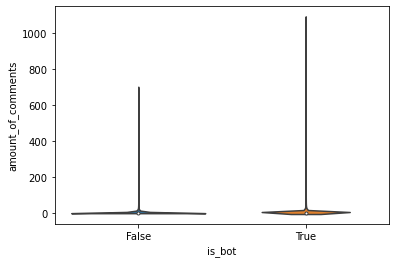

In [13]:
# Amount of comments
sns.violinplot(data=df, x="is_bot", y="amount_of_comments")

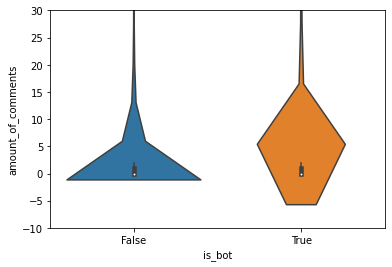

In [19]:
# Amount of comments zoomed in
plt.ylim(-10, 30)
sns.violinplot(data=df, x="is_bot", y="amount_of_comments")
plt.show()

Observations:
- bots seem to indeed put more comments
- bots sometimes post negative amounts of comments? This is weird.

<AxesSubplot:xlabel='is_bot', ylabel='comment_length'>

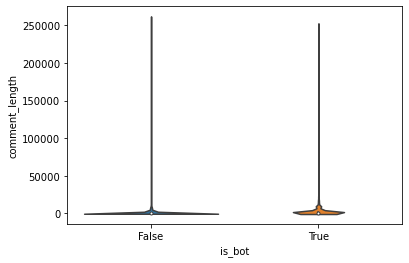

In [20]:
# Length of comments
sns.violinplot(data=df, x="is_bot", y="comment_length")

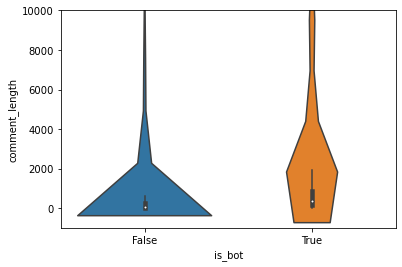

In [23]:
# Length of comments zoomed in
plt.ylim(-1000, 10000)
sns.violinplot(data=df, x="is_bot", y="comment_length")
plt.show()

Observations:
- we again see negative comment lengths. This might be due to anonymization techniques.
- again, the distribution shows that bots put larger comments on average